# The Sparks Foundation
# Data science and Business Analytics Intern (July-2022)
# Author: Sadaf Siddiqui
# Task 2: Prediction using Supervised ML

### Problem statement: Predict the percentage of an student based on the no. of study hours.

In [12]:
# importing the important libraries to be used

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import urllib.request
import requests

In [16]:
# loading the data

url='https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
data=pd.read_csv(url)

In [17]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [19]:
# Exploring the dataset
# check if there are any null value in the data set
data.isnull==True

False

There is no null value present in the dataset so we can now visualize our data

In [20]:
data.shape # no. of rows and columns

(25, 2)

In [21]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Visualization:

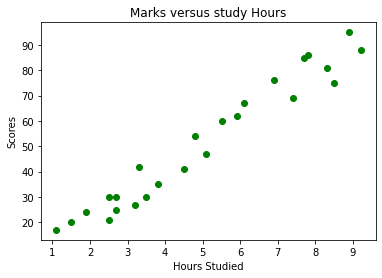

In [22]:
# Hours versus percentage of scores

plt.scatter(data['Hours'],data['Scores'],color='green')
plt.title('Marks versus study Hours')
plt.xlabel('Hours Studied')
plt.ylabel('Scores')
plt.show()


From the above scatter plot we can see the correlation between the 'Scores' and 'Hours Studied'. Lets plot a regression line to confirm the correlation

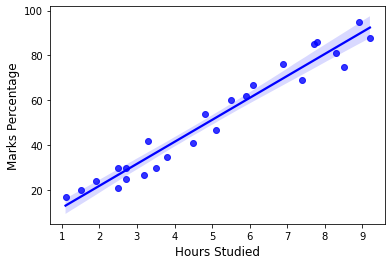

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [23]:
sns.regplot(x=data['Hours'],y=data['Scores'], color='blue')
plt.ylabel('Marks Percentage',size=12)
plt.xlabel('Hours Studied',size=12)
plt.show()
print(data.corr())

It is confirmed that the variables are positively correlated

In [29]:
# Training the model

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [30]:
# Defining x & y from the data

x=data.iloc[:,:-1].values
y=data.iloc[:,1].values

In [31]:
# Splitting the data
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=0)

In [33]:
# Fitting the data into the model
regression=LinearRegression()
regression.fit(train_x,train_y)

LinearRegression()

In [34]:
# Plotting the regression line
line=regression.coef_*x+regression.intercept_

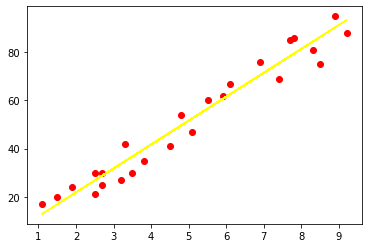

In [35]:
# Plotting for the test data
plt.scatter(x,y,color='red')
plt.plot(x,line,color='yellow')
plt.show()

In [39]:
# predicting the percentage of marks for the test set

pred_y=regression.predict(test_x)
prediction=pd.DataFrame({'Hours':[i[0]for i in test_x],'Predicted Marks':[k for k in pred_y]})
prediction

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


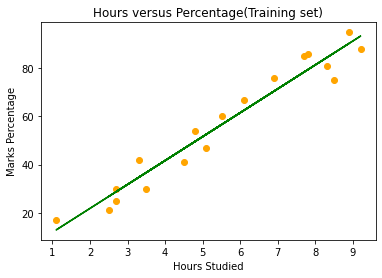

In [42]:
#  Visualing the training set result
plt.scatter(train_x,train_y,color="orange")
plt.plot(train_x,regression.predict(train_x),color='green')
plt.title('Hours versus Percentage(Training set)')
plt.xlabel('Hours Studied')
plt.ylabel('Marks Percentage')
plt.show()

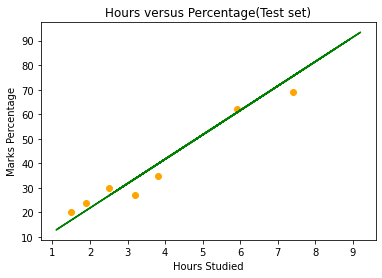

In [43]:
# Visualising the test set result
plt.scatter(test_x,test_y,color="orange")
plt.plot(train_x,regression.predict(train_x),color='green')
plt.title('Hours versus Percentage(Test set)')
plt.xlabel('Hours Studied')
plt.ylabel('Marks Percentage')
plt.show()

In [44]:
#Comparing the predicted marks with the actual marks

compare=pd.DataFrame({'Actual Marks':test_y,'Predicted Marks':pred_y})
compare

,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


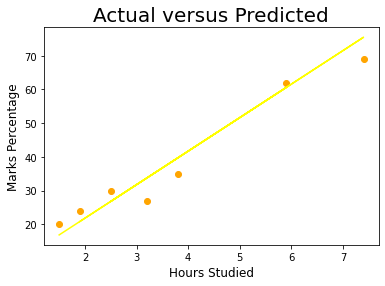

In [46]:
# Visually comparing the predicted marks with the actual marks
plt.scatter(x=test_x,y=test_y,color='orange')
plt.plot(test_x,pred_y,color='yellow')
plt.title('Actual versus Predicted',size=20)
plt.ylabel('Marks Percentage',size=12)
plt.xlabel('Hours Studied',size=12)
plt.show()

In [47]:
# Evaluating the model
# calculating the accuracy of the model
print('mean absolute error:',mean_absolute_error(test_y,pred_y))

mean absolute error: 4.130879918502486


### small value of mean absolute error states that the chances of errors through the model are very less

In [48]:
from sklearn.metrics import r2_score
print("The R-square of the model is:",r2_score(test_y,pred_y))

The R-square of the model is: 0.9367661043365055


In [49]:
# What will be the predicted score of a student if he/she studies for 9.25 hrs/day?
hrs=[9.25]
answer=regression.predict([hrs])
print("Score={}".format(round(answer[0],3)))

Score=93.893


## Conclusion:
According to the regression model , if a student studies for 9.25 hours a day, He/She is likely to score 93.89 marks